In [1]:
# for data manipulations
import pandas as pd
import numpy as np
import os

# for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl 

# for data splitting
from sklearn.model_selection import train_test_split

# for data processing
from sklearn.preprocessing import StandardScaler

# Label encode target column
from sklearn.preprocessing import LabelEncoder

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from xgboost.sklearn import XGBClassifier

# Hyperparameter optimization
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


##Mounting Google Drive


In [2]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
drive.mount("/gdrive", force_remount=True)

Mounted at /gdrive


In [5]:
path = '/gdrive/MyDrive/BDDA-1 Mid term Project '
os.chdir(path)
os.listdir()

['airline dataset.csv']

In [6]:
ls "/gdrive/MyDrive/BDDA-1 Mid term Project "

'airline dataset.csv'


In [7]:
df = pd.read_csv("airline dataset.csv")

## Exploratory Data Analysis

In [8]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,3,2,5,4,5,5,2,5.0,neutral or dissatisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,5,5,5,3,5,5,26,39.0,satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,3,3,3,4,3,5,0,0.0,satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,5,5,5,3,5,4,0,0.0,satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,4,3,3,3,5,0,1.0,satisfied


In [9]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')

In [10]:
df.shape

(129880, 24)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 24 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  object 
 2   Customer Type                      129880 non-null  object 
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  object 
 5   Class                              129880 non-null  object 
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [12]:
# Checking for null values
df.isnull().sum()

id                                     0
Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             393
satisfaction                           0
dtype: int64

In [13]:
# Replacing null vales with mean
df['Arrival Delay in Minutes'] = df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].mean())

In [14]:
df['Customer Type'].value_counts()

Loyal Customer       106100
disloyal Customer     23780
Name: Customer Type, dtype: int64

In [15]:
df['Type of Travel'].value_counts()

Business travel    89693
Personal Travel    40187
Name: Type of Travel, dtype: int64

In [16]:
df['Class'].value_counts()

Business    62160
Eco         58309
Eco Plus     9411
Name: Class, dtype: int64

In [17]:
df['Inflight wifi service'].value_counts()

2    32320
3    32185
4    24775
1    22328
5    14356
0     3916
Name: Inflight wifi service, dtype: int64

In [18]:
df['satisfaction'].value_counts()

neutral or dissatisfied    73452
satisfied                  56428
Name: satisfaction, dtype: int64

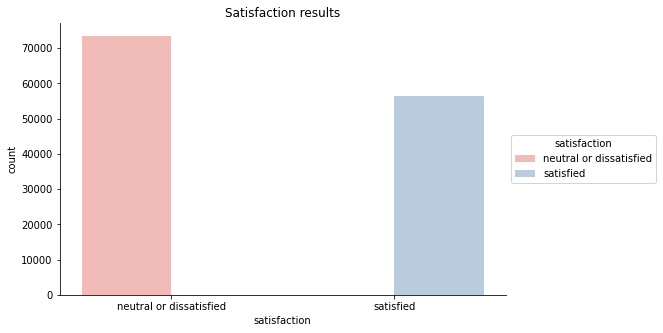

In [19]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="satisfaction", data = df, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

neutral or dissatisfied customers are more than satisfied customers by 17024.
56.67 % of the passenger were neutral or dissatisfied with the service provided by the airline

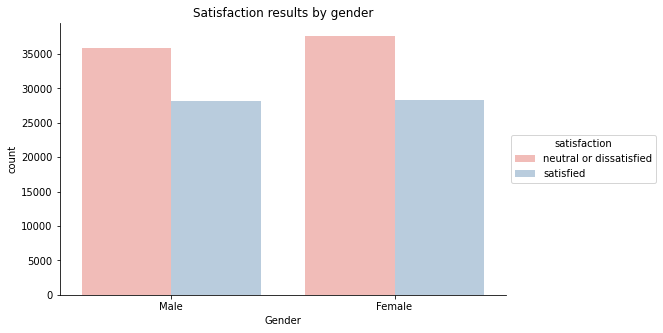

In [20]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Gender", data = df, hue ="satisfaction", palette ="Pastel1" )

# format graph
sns.despine(top = True, right = True, left = False, bottom = False)
plt.title("Satisfaction results by gender")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

The gender split in the dataset is relatively even with 49.25% of the passengers male. It should be acknowledged that this is a binary classification leaving little room for those who do not wish to disclose their gender or do not conform to the two traditional genders. Subsequently, in reruns of such surveys, criteria gender could be updated.

Leaving aside, it appears that the satisfaction level for both genders were relatively similar, with over 55% of individuals from both genders reporting that they were not satisfied with the service.

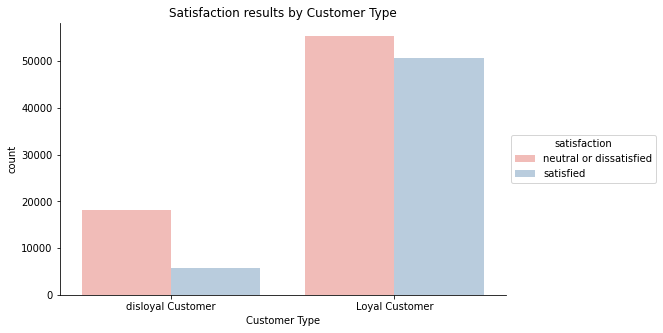

In [21]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Customer Type", data = df, hue ="satisfaction" ,palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Customer Type")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()


This variable when examined alongside overall satisfaction, highlights a major concern. There is a high number of loyal customers that are dissatisfied with the services. Given that individuals typically become loyal customers because they value the services offered by the said business, their lack of satisfaction suggests that the service may have changed recently or that the service is failing to meet the transforming market. As stated previously, loyal customers can be the backbone of a business and as such if the service does not improve, the business may face difficulty.

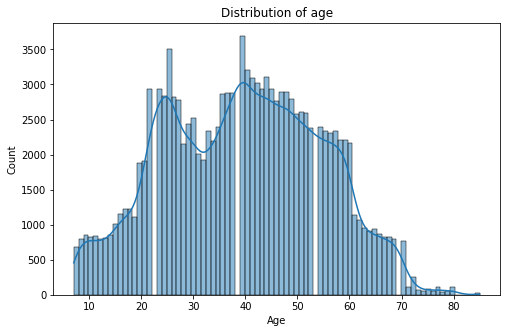

In [22]:
# create graph
plt.figure(figsize = (8,5))
sns.histplot( x= "Age", data = df, kde= True)

# format graph
plt.title("Distribution of age")
plt.show()

Age
Examining the age variable, some aspects appear prominently. Firstly, it appears that the majority of those satisfied with the quality of the service were above average age, between 40 and 60. However, after approx. 60years, satisfaction suddenly drops. Likewise, many of the younger passengers found issues with the service.

In [23]:
# defining numerical variables
num = [col for col in df.columns if df[col].dtypes!='O']
num

['id',
 'Age',
 'Flight Distance',
 'Inflight wifi service',
 'Departure/Arrival time convenient',
 'Ease of Online booking',
 'Gate location',
 'Food and drink',
 'Online boarding',
 'Seat comfort',
 'Inflight entertainment',
 'On-board service',
 'Leg room service',
 'Baggage handling',
 'Checkin service',
 'Inflight service',
 'Cleanliness',
 'Departure Delay in Minutes',
 'Arrival Delay in Minutes']

In [24]:
len(num)

19

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

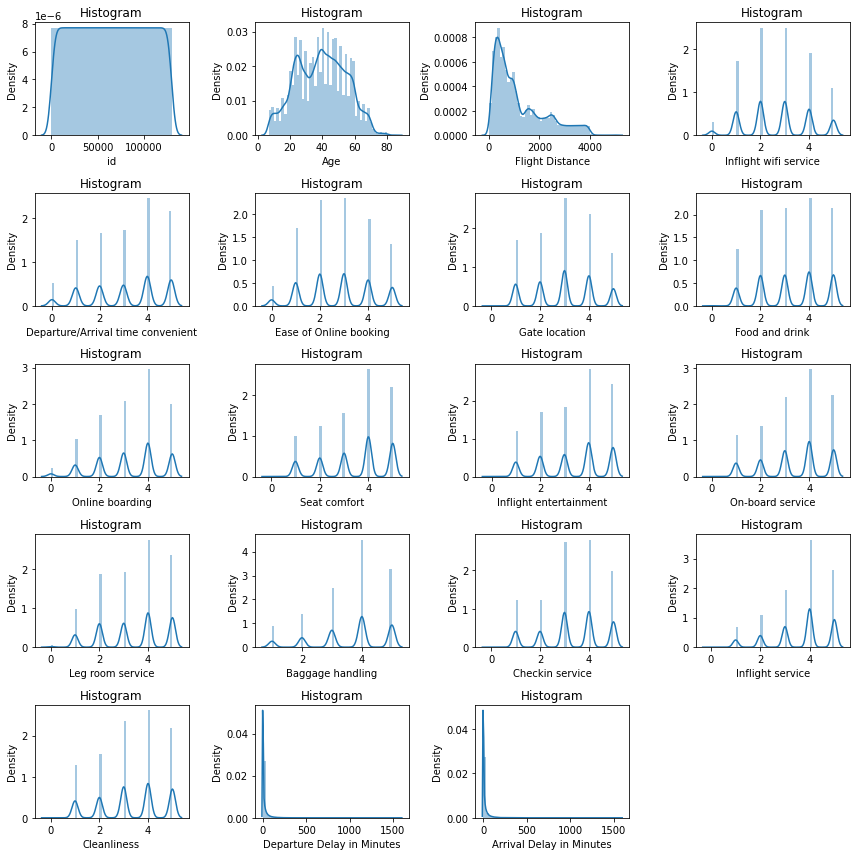

In [25]:
plt.figure(figsize=(12, 12))
n=1
for i in num:
    plt.subplot(5, 4, n)
    sns.distplot(df[i])
    plt.title(f'Histogram')
    n=n+1
plt.tight_layout()
plt.show()

Least Rated Services :
Inflight wifi Service - 2
Ease of online booking - 3
Gate Location - 3



In [67]:
# defining categorical variables
cat = [col for col in df.columns if df[col].dtypes=='O']
cat

['Gender',
 'Customer Type',
 'Type of Travel',
 'Class',
 'satisfaction',
 'Total_score_cat']

In [68]:
len(cat)

6

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn

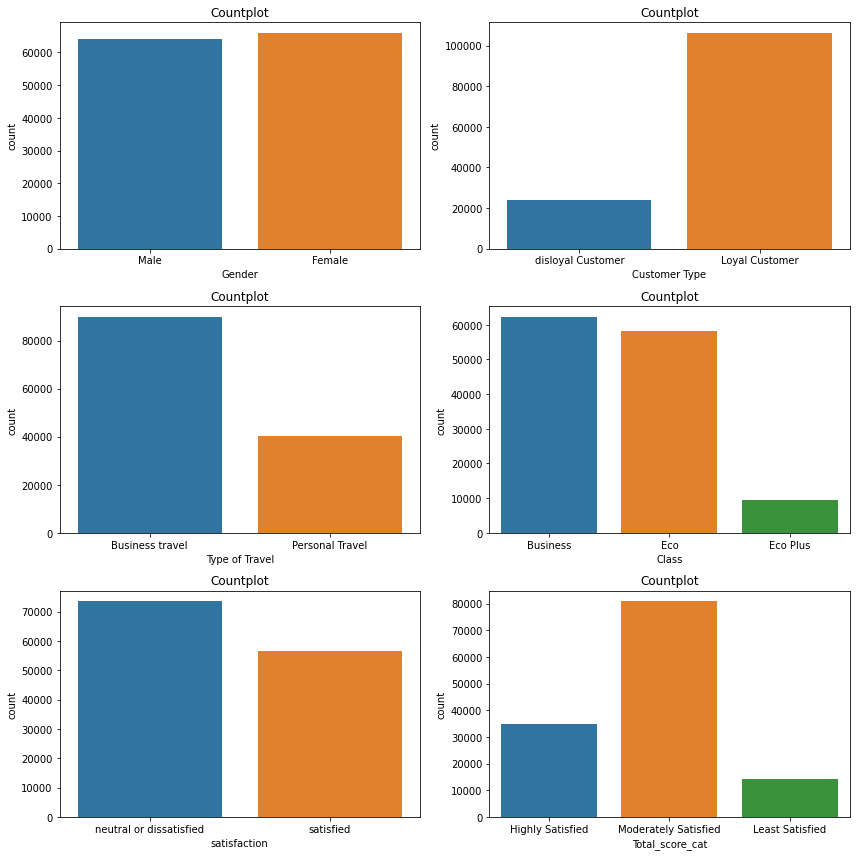

In [69]:

plt.figure(figsize=(12, 12))
n=1
for i in cat:
    plt.subplot(3, 2, n)
    sns.countplot(df[i])
    plt.title(f'Countplot')
    n=n+1
plt.tight_layout()
plt.show()

Female customers are more than Male customers.
Loyal customers are more than disloyal customers.
People travel more in business travel than personal travel.
Business class is preferred more than Eco and Eco plus.


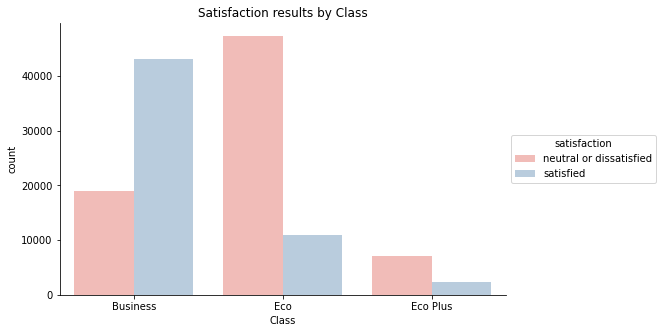

In [70]:
# create graph
plt.figure(figsize = (8,5))
sns.countplot(x ="Class", data = df, hue ="satisfaction",palette ="Pastel1" )

# format graph
plt.title("Satisfaction results by Class")
sns.despine(top = True, right = True, left = False, bottom = False)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),  title = "satisfaction")

plt.show()

Classes also highlight the dominance of business travel as the majority who travelled via business class were satisfied with the service they received. In contrast, those who were in eco class were particularly dissatisfied with the service, with 81% voicing dissatisfaction. Given that 45% of the passengers travelled via eco, the airline should focus on improving their services in this area.

In [71]:
# single out variables which are related to service scores
service_scores = df[['Inflight wifi service','Departure/Arrival time convenient', 
                              'Ease of Online booking','Gate location', 'Food and drink', 
                              'Online boarding', 'Seat comfort','Inflight entertainment', 'On-board service', 'Leg room service',
                              'Baggage handling', 'Checkin service', 'Inflight service','Cleanliness']]

In [72]:
# calculate sum of scores
df["Total_score"] = service_scores.sum(axis = 1)

In [73]:
# find max possible score 
max_score = len(service_scores.columns)*5

In [74]:
# convert sum of scores to percentage
df["Total_score_percent"] = round((df["Total_score"]/max_score)*100,1)

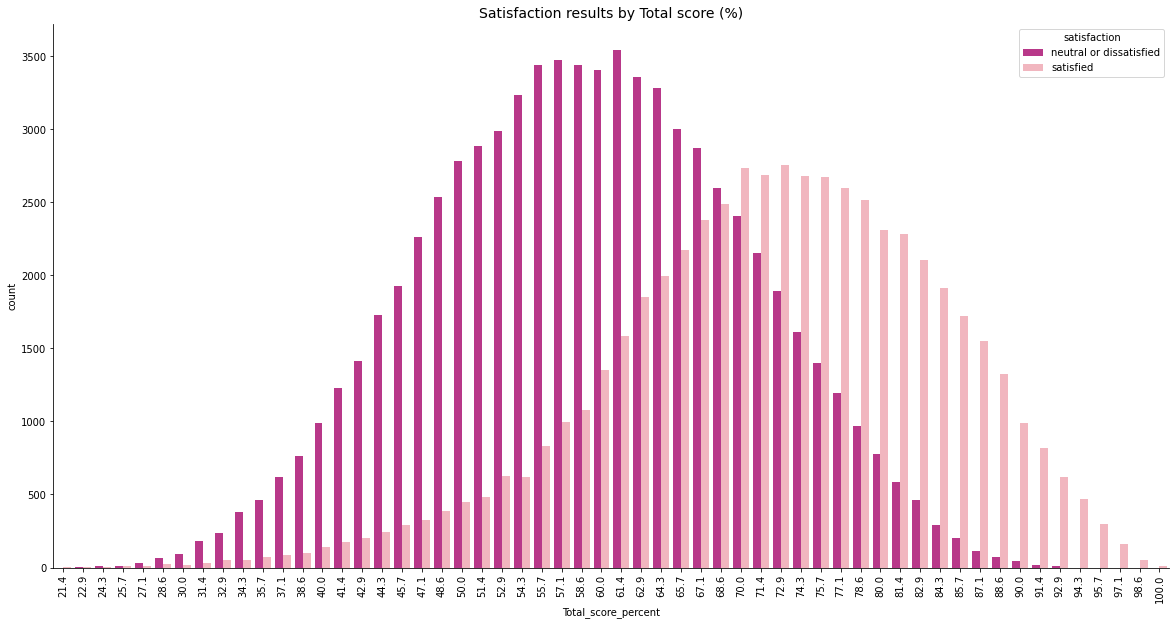

In [75]:
# create graph
plt.figure(figsize = (20,10))
sns.countplot(x ="Total_score_percent", data = df, hue ="satisfaction",palette ="RdPu_r" )

# format graph
plt.title("Satisfaction results by Total score (%)", fontsize = 14)
sns.despine(top = True, right = True, left = False, bottom = False)
plt.xticks(rotation=90)
plt.legend(loc='upper right', title = "satisfaction")
plt.show()

It appears that the airline has strengths in servicing business travellers. However, their offering especially for eco flights appears to be weak. Passengers also appear to be sensitive to certain aspects of their services and as such the airline should tackle such issues as a priority to improve services. This includes inflight wifi and departure time. That said, if the airline wishes to continue to focus on business travellers aspects such as online booking and seat comfort should be prioritised.

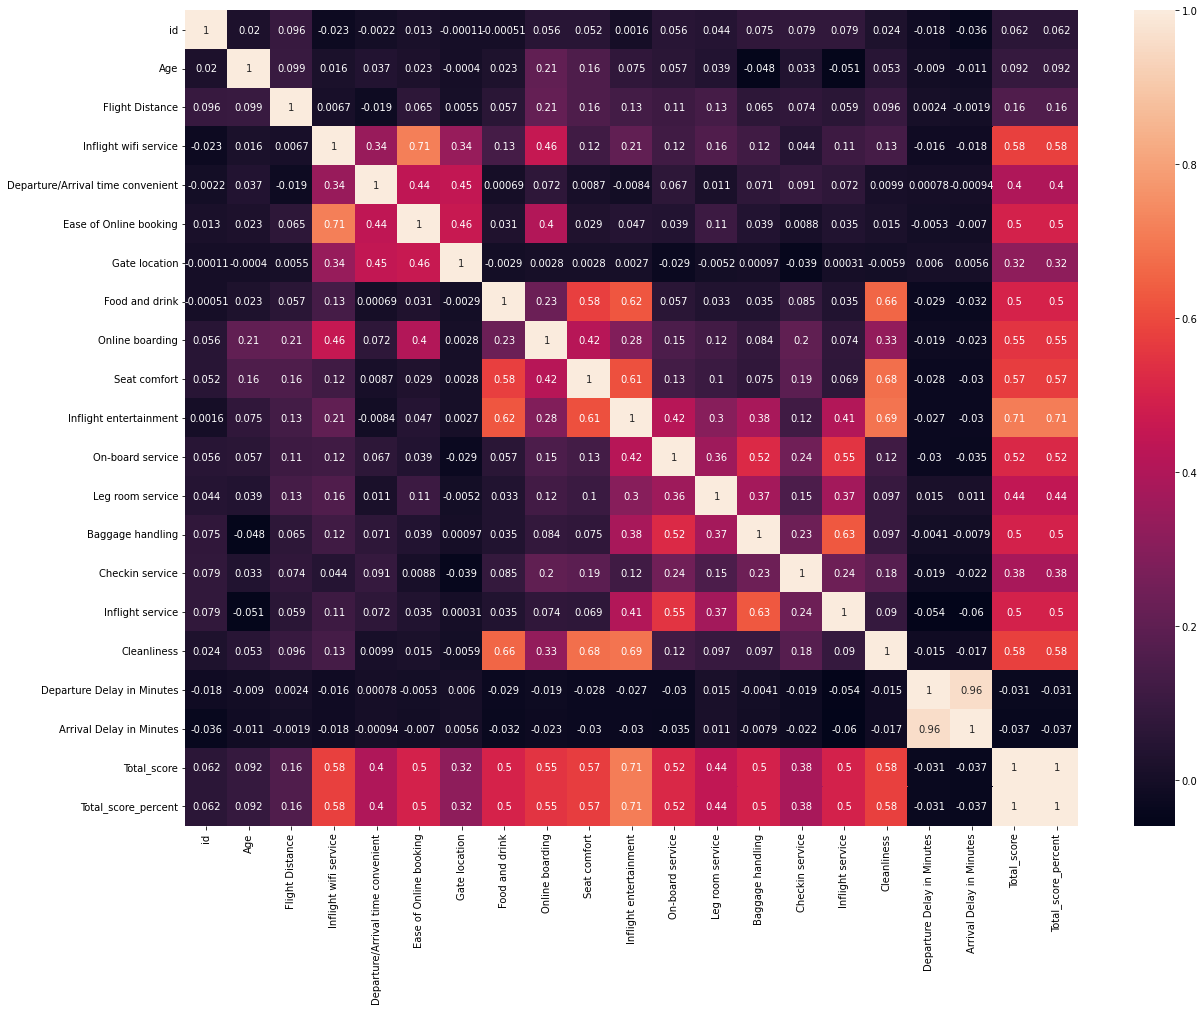

In [76]:
fig, ax = plt.subplots(figsize=(20, 15))
ax = sns.heatmap(df.corr(), annot = True)

Text(0.5, 1.0, 'Online boarding satisfaction in refrence to type of travel')

<Figure size 432x288 with 0 Axes>

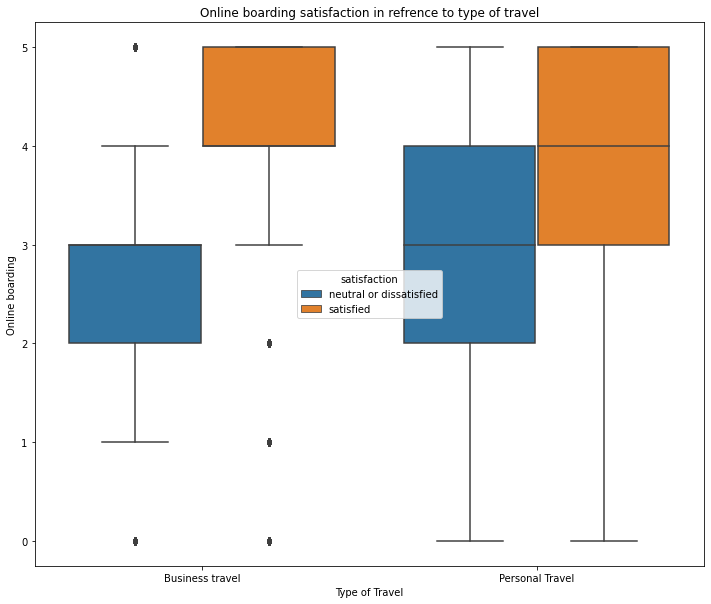

In [77]:
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='Type of Travel',y='Online boarding',hue='satisfaction', data=df)
plt.title("Online boarding satisfaction in refrence to type of travel")

Consumers of business travel are more satisfied from online boarding as their mean lies between 4 and 5


In [78]:
df['Total_score_cat'] = pd.cut(df['Total_score'],               # Equal interval cuts between min and max

                       3,                       # Three cuts

                       labels=["Least Satisfied","Moderately Satisfied","Highly Satisfied"]    # Label for each cut

                       )

Text(0.5, 1.0, 'Online boarding satisfaction in refrence to type of travel')

<Figure size 432x288 with 0 Axes>

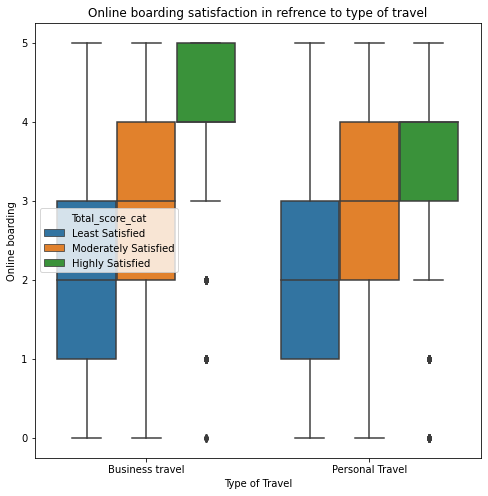

In [79]:
plt.figure()
plt.figure(figsize=(8,8))
sns.boxplot(x='Type of Travel',y='Online boarding',hue='Total_score_cat', data=df)
plt.title("Online boarding satisfaction in refrence to type of travel")

Text(0.5, 1.0, 'Customer Type in Refrence with Age')

<Figure size 432x288 with 0 Axes>

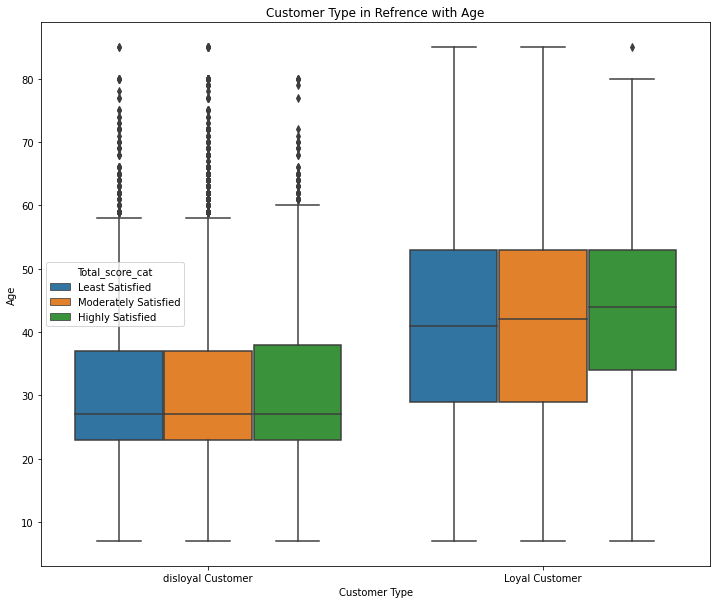

In [80]:
plt.figure()
plt.figure(figsize=(12,10))
sns.boxplot(x='Customer Type',y='Age',hue='Total_score_cat', data=df)
plt.title("Customer Type in Refrence with Age")

disloyal customers have the same mean age for all 3 categories wheras people above 40 are loyal customers.


In [81]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_score,Total_score_percent,Total_score_cat
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,4,5,5,2,5.0,neutral or dissatisfied,54,77.1,Highly Satisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,3,5,5,26,39.0,satisfied,53,75.7,Highly Satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,4,3,5,0,0.0,satisfied,55,78.6,Highly Satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,3,5,4,0,0.0,satisfied,53,75.7,Highly Satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,3,5,0,1.0,satisfied,49,70.0,Moderately Satisfied


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   id                                 129880 non-null  int64   
 1   Gender                             129880 non-null  object  
 2   Customer Type                      129880 non-null  object  
 3   Age                                129880 non-null  int64   
 4   Type of Travel                     129880 non-null  object  
 5   Class                              129880 non-null  object  
 6   Flight Distance                    129880 non-null  int64   
 7   Inflight wifi service              129880 non-null  int64   
 8   Departure/Arrival time convenient  129880 non-null  int64   
 9   Ease of Online booking             129880 non-null  int64   
 10  Gate location                      129880 non-null  int64   
 11  Food and drink            

In [83]:
df['Total_score_cat'] = df['Total_score_cat'].astype('object')

## Checking Structure in Data

In [84]:
ss= StandardScaler()

In [85]:
nc = ss.fit_transform(df.loc[:,num])

In [86]:
nc.shape 

(129880, 19)

In [87]:
nc = pd.DataFrame(nc, columns = num)
nc.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.732037,0.566960,-0.370261,0.204090,-0.037727,0.173445,0.018048,1.349867,-0.187037,1.181428,1.230787,-0.297587,-1.026310,1.159206,0.547894,1.153946,1.304487,-0.333948,-0.262740
1,-1.732011,-0.292868,-0.370261,-0.548166,-0.692719,-0.539957,-0.764109,-0.153973,1.293662,0.423441,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,1.304487,0.296454,0.622509
2,-1.731984,0.103976,-0.338179,0.956346,0.617265,0.886847,0.800206,1.349867,1.293662,1.181428,-0.268414,-0.297587,-0.266574,-0.535681,0.547894,-0.545774,1.304487,-0.386481,-0.392924
3,-1.731957,0.699242,0.716512,-0.548166,-0.692719,-0.539957,-0.764109,0.597947,0.553313,1.181428,1.230787,1.256300,1.252898,1.159206,-0.241883,1.153946,0.543264,-0.386481,-0.392924
4,-1.731931,0.633101,2.285515,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,0.423441,-0.268414,-0.297587,0.493162,-0.535681,-0.241883,-0.545774,1.304487,-0.386481,-0.366887


In [88]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cat:
    nc[i] = le.fit_transform(df[i])

In [89]:
df.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,Total_score,Total_score_percent,Total_score_cat
0,1,Male,disloyal Customer,48,Business travel,Business,821,3,3,3,...,5,4,5,5,2,5.0,neutral or dissatisfied,54,77.1,Highly Satisfied
1,2,Female,Loyal Customer,35,Business travel,Business,821,2,2,2,...,5,3,5,5,26,39.0,satisfied,53,75.7,Highly Satisfied
2,3,Male,Loyal Customer,41,Business travel,Business,853,4,4,4,...,3,4,3,5,0,0.0,satisfied,55,78.6,Highly Satisfied
3,4,Male,Loyal Customer,50,Business travel,Business,1905,2,2,2,...,5,3,5,4,0,0.0,satisfied,53,75.7,Highly Satisfied
4,5,Female,Loyal Customer,49,Business travel,Business,3470,3,3,3,...,3,3,3,5,0,1.0,satisfied,49,70.0,Moderately Satisfied


In [90]:
nc.shape

(129880, 25)

In [91]:
from numpy.random import default_rng
rng = default_rng()

In [92]:
rng = np.random.default_rng()
nc_rand = pd.DataFrame(rng.normal(size = (129880,19)),
                       columns = num   # Assign column names, just like that
                       )

In [93]:
## Creating dataframe from random data
nc_rand['gender'] = np.random.randint(2,   size= (129880,))   # [0,1]
nc_rand['Customer Type']        = np.random.randint(1,4,   size= (129880,))   # [1,2,3]
nc_rand['Type of Travel']       = np.random.randint(1,4, size= (129880,))   # [1,2,3]
nc_rand['Class']     = np.random.randint(2,  size= (129880,))   # [0,1]
nc_rand['satisfaction']       = np.random.randint(2,   size= (129880,))   # [0,1]
nc_rand['Total_score_cat']       = np.random.randint(1,4,   size= (129880,))   # [0,1]

## Parallel Coordinates Plot

Text(0.5, 1.0, 'Parallel chart with random data')

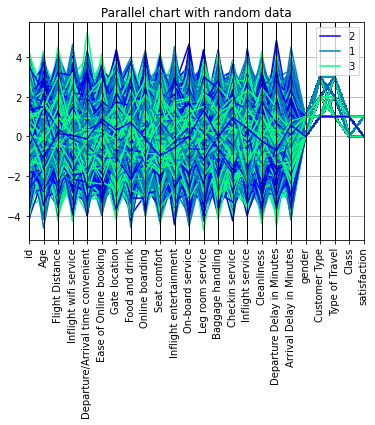

In [94]:

# Parallel coordinates with random data
fig1 = plt.figure()
pd.plotting.parallel_coordinates(nc_rand,
                                 'Total_score_cat',    # class_column
                                  colormap='winter'
                                  )
plt.xticks(rotation=90)
plt.title("Parallel chart with random data")

Text(0.5, 1.0, 'Parallel chart with ad data')

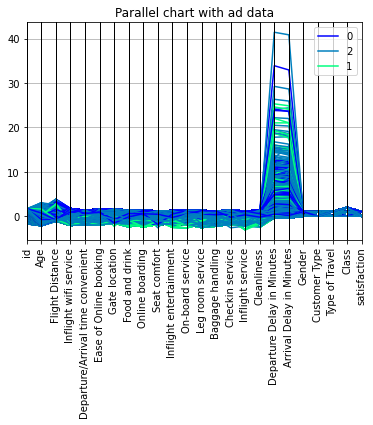

In [95]:
# Parallel coordinates with 'placements' data
fig2 = plt.figure()
ax = pd.plotting.parallel_coordinates(nc,
                                 'Total_score_cat',
                                  colormap= 'winter'
                                  )

plt.xticks(rotation=90)
plt.title("Parallel chart with ad data")

In [96]:
nc.head()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,...,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,Gender,Customer Type,Type of Travel,Class,satisfaction,Total_score_cat
0,-1.732037,0.566960,-0.370261,0.204090,-0.037727,0.173445,0.018048,1.349867,-0.187037,1.181428,...,1.153946,1.304487,-0.333948,-0.262740,1,1,0,0,0,0
1,-1.732011,-0.292868,-0.370261,-0.548166,-0.692719,-0.539957,-0.764109,-0.153973,1.293662,0.423441,...,1.153946,1.304487,0.296454,0.622509,0,0,0,0,1,0
2,-1.731984,0.103976,-0.338179,0.956346,0.617265,0.886847,0.800206,1.349867,1.293662,1.181428,...,-0.545774,1.304487,-0.386481,-0.392924,1,0,0,0,1,0
3,-1.731957,0.699242,0.716512,-0.548166,-0.692719,-0.539957,-0.764109,0.597947,0.553313,1.181428,...,1.153946,0.543264,-0.386481,-0.392924,1,0,0,0,1,0
4,-1.731931,0.633101,2.285515,0.204090,-0.037727,0.173445,0.018048,0.597947,1.293662,0.423441,...,-0.545774,1.304487,-0.386481,-0.366887,0,0,0,0,1,2


## Andrews Plot

Text(0.5, 1.0, 'Andrews plots with random data')

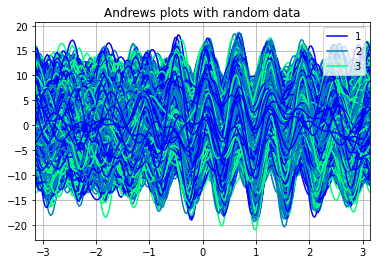

In [67]:
# Andrews chart with random data
fig3 = plt.figure()
pd.plotting.andrews_curves(nc_rand,
                           'Total_score_cat',
                           colormap = 'winter')

plt.title("Andrews plots with random data")

Text(0.5, 1.0, 'Andrews curve with original data')

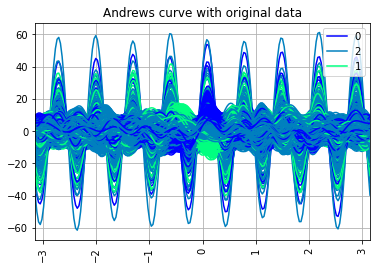

In [68]:
# Andrews curve chart with orignal data
fig4 = plt.figure()
pd.plotting.andrews_curves(nc,
                           'Total_score_cat',
                            colormap = plt.cm.winter
                           )
plt.xticks(rotation=90)
plt.title("Andrews curve with original data")

In [70]:
df.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total_score', 'Total_score_percent',
       'Total_score_cat'],
      dtype='object')

In [71]:
#  Popout target
#  to separate predictors and target

y = df['satisfaction']

#Create an alias of predictors dataset 
X = df  # X is another name for df

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat] = X[cat].apply(le.fit_transform)

In [73]:
df["satisfaction"].value_counts()

0    73452
1    56428
Name: satisfaction, dtype: int64

In [74]:
y = y.map({'neutral or dissatisfied':0, 'satisfied':1})

In [75]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [76]:
X.min().min()          
X.max().max()          

# Save memory
X = X.astype('float64')


In [77]:
X.columns

Index(['id', 'Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction', 'Total_score', 'Total_score_percent',
       'Total_score_cat'],
      dtype='object')

In [78]:
cat_c = ['gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction', 'Total_score_cat']

In [79]:
#  Split dataset. We will preprocess X_train and apply that
#     processing to X_test later
X_train,X_test, y_train, y_test = train_test_split(
                                                    X,                   # Data features
                                                    y,                   # Target column
                                                    test_size = 0.2      # split-ratio
                                                    )

## Create Pipeline - Using XiBoost

In [80]:
#  Instantiate Pipeline object for 
#      processing numerical data. Impute = mean
#      Pipeline as a composite transformer
from sklearn.impute import SimpleImputer
pipe_num =     Pipeline(
                      [
                       ('si', SimpleImputer(strategy='mean')),
                       ('ss1', StandardScaler())
                      ]
                    )

In [81]:
from sklearn.preprocessing import OneHotEncoder as onehot
pipe_cat  =  Pipeline(
                     [
                      ('mf', SimpleImputer(strategy='most_frequent')),
                      ('ohe', onehot())
                     ]
                   )


In [82]:
# Test transformers:
# Feed data to each pipe to see if it is working
# It is like testing a sub-component
# before full-plumbing is done.
# No error should come.

pipe_cat.fit_transform(X_train[cat])
pipe_num.fit_transform(X_train[num])

array([[ 0.43004145,  1.0319503 , -0.01684581, ..., -0.22198808,
        -0.38439866, -0.39118594],
       [-0.22799656,  0.3039304 , -0.99503431, ..., -0.22198808,
        -0.14856079,  2.73147568],
       [ 1.12017692,  0.37011403, -0.61680143, ...,  1.30018238,
        -0.38439866, -0.39118594],
       ...,
       [ 0.85891478,  0.23774677,  0.4516814 , ...,  0.53909715,
        -0.12235658,  0.15527984],
       [-1.72435733, -0.95355853, -0.3679904 , ...,  0.53909715,
        -0.38439866, -0.39118594],
       [-0.65046641, -0.35790588, -0.80340969, ...,  0.53909715,
         0.27070653,  0.25936857]])

In [83]:
#  Collecting all pipes in column transformer
#     along with column names
#     All pipes operate parallely
#                       some-name  transformer     col-names

ct_transformer = ColumnTransformer(
                                    [
                                      ('p_m',   pipe_cat,   cat),
                                      ('p_mean',pipe_num,   num)
                                    ]
                                  )

In [84]:
#  Test column transformet
ct_transformer.fit_transform(X_train)

array([[ 0.        ,  1.        ,  1.        , ..., -0.22198808,
        -0.38439866, -0.39118594],
       [ 1.        ,  0.        ,  1.        , ..., -0.22198808,
        -0.14856079,  2.73147568],
       [ 1.        ,  0.        ,  1.        , ...,  1.30018238,
        -0.38439866, -0.39118594],
       ...,
       [ 1.        ,  0.        ,  0.        , ...,  0.53909715,
        -0.12235658,  0.15527984],
       [ 0.        ,  1.        ,  1.        , ...,  0.53909715,
        -0.38439866, -0.39118594],
       [ 0.        ,  1.        ,  1.        , ...,  0.53909715,
         0.27070653,  0.25936857]])

In [85]:
from sklearn.tree import DecisionTreeClassifier 
outer_pipe = Pipeline(
                      [
                       ('ct', ct_transformer),        # Column transformer object
                       ('dt', DecisionTreeClassifier()) # Estimator
                      ]
                     )

In [86]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 129880 entries, 0 to 129879
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 129880 non-null  int64  
 1   Gender                             129880 non-null  int64  
 2   Customer Type                      129880 non-null  int64  
 3   Age                                129880 non-null  int64  
 4   Type of Travel                     129880 non-null  int64  
 5   Class                              129880 non-null  int64  
 6   Flight Distance                    129880 non-null  int64  
 7   Inflight wifi service              129880 non-null  int64  
 8   Departure/Arrival time convenient  129880 non-null  int64  
 9   Ease of Online booking             129880 non-null  int64  
 10  Gate location                      129880 non-null  int64  
 11  Food and drink                     1298

In [87]:
df.isnull().sum()

id                                   0
Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
Total_score                          0
Total_score_percent      

In [88]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103904 entries, 81027 to 40530
Data columns (total 27 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   id                                 103904 non-null  float64
 1   Gender                             103904 non-null  float64
 2   Customer Type                      103904 non-null  float64
 3   Age                                103904 non-null  float64
 4   Type of Travel                     103904 non-null  float64
 5   Class                              103904 non-null  float64
 6   Flight Distance                    103904 non-null  float64
 7   Inflight wifi service              103904 non-null  float64
 8   Departure/Arrival time convenient  103904 non-null  float64
 9   Ease of Online booking             103904 non-null  float64
 10  Gate location                      103904 non-null  float64
 11  Food and drink                     1

In [89]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [90]:
df = round(X_train, 2)
df =round(y_train, 2)

In [91]:
df.fillna(999, inplace=True)

In [92]:
#  Train on data using final_pipe
# We use (X_train, y_train)

outer_pipe.fit(X_train,y_train)

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_m',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class',
                                                   'satisfaction',
                                                   'Total_score_cat']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer()),
                                                                

In [93]:
#  Make prediction on test data
#     Note that there is no need to separately
#     transform X_test. Pipes take care of that

outer_pipe.predict(X_test)

array([1, 0, 0, ..., 0, 0, 1])

In [94]:
y_test

123355    1
55776     0
81609     0
121728    1
125943    0
         ..
127090    0
24257     0
30394     0
78850     0
9011      1
Name: satisfaction, Length: 25976, dtype: int64

In [95]:
from sklearn import set_config
set_config(display='diagram')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_m',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class',
                                                   'satisfaction',
                                                   'Total_score_cat']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer()),
                                                                  ('ss1',
                                                                   StandardScaler())]),
                                                  ['id', 'Age',
                                                   'Flight Distance',
                                                   'Inflight wifi service',
                                                   'Departure/Arrival time '
                                                   'convenient',
                                                   'Ease of Online booking',
                                                   'Gate location',
                                                   'Food and drink',
                                                   'Online boarding',
                                                   'Seat comfort',
                                                   'Inflight entertainment',
                                                   'On-board service',
                                                   'Leg room service',
                                                   'Baggage handling',
                                                   'Checkin service',
                                                   'Inflight service',
                                                   'Cleanliness',
                                                   'Departure Delay in Minutes',
                                                   'Arrival Delay in '
                                                   'Minutes'])])),
                ('dt', DecisionTreeClassifier())])

In [96]:
set_config(display='text')
outer_pipe

Pipeline(steps=[('ct',
                 ColumnTransformer(transformers=[('p_m',
                                                  Pipeline(steps=[('mf',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder())]),
                                                  ['Gender', 'Customer Type',
                                                   'Type of Travel', 'Class',
                                                   'satisfaction',
                                                   'Total_score_cat']),
                                                 ('p_mean',
                                                  Pipeline(steps=[('si',
                                                                   SimpleImputer()),
                                                                

In [97]:

from sklearn.decomposition import PCA

steps_xg = [('sts', StandardScaler() ),
            ('pca', PCA()),
            ('xg',  XGBClassifier(silent = False,
                                  n_jobs=3)        # Specify other parameters here
            )
            ]

In [98]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[cat] = X[cat].apply(le.fit_transform)

In [99]:

pipe_xg = Pipeline(steps_xg)


In [100]:
# Grid Search
# What parameters in the pipe are available for tuning
pipe_xg.get_params()

{'memory': None,
 'steps': [('sts', StandardScaler()),
  ('pca', PCA()),
  ('xg', XGBClassifier(n_jobs=3, silent=False))],
 'verbose': False,
 'sts': StandardScaler(),
 'pca': PCA(),
 'xg': XGBClassifier(n_jobs=3, silent=False),
 'sts__copy': True,
 'sts__with_mean': True,
 'sts__with_std': True,
 'pca__copy': True,
 'pca__iterated_power': 'auto',
 'pca__n_components': None,
 'pca__random_state': None,
 'pca__svd_solver': 'auto',
 'pca__tol': 0.0,
 'pca__whiten': False,
 'xg__base_score': 0.5,
 'xg__booster': 'gbtree',
 'xg__colsample_bylevel': 1,
 'xg__colsample_bynode': 1,
 'xg__colsample_bytree': 1,
 'xg__gamma': 0,
 'xg__learning_rate': 0.1,
 'xg__max_delta_step': 0,
 'xg__max_depth': 3,
 'xg__min_child_weight': 1,
 'xg__missing': None,
 'xg__n_estimators': 100,
 'xg__n_jobs': 3,
 'xg__nthread': None,
 'xg__objective': 'binary:logistic',
 'xg__random_state': 0,
 'xg__reg_alpha': 0,
 'xg__reg_lambda': 1,
 'xg__scale_pos_weight': 1,
 'xg__seed': None,
 'xg__silent': False,
 'xg__subs

In [101]:
# Define dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  # See this answer in stackoverflow:
                                                  # https://stats.stackexchange.com/questions/354484/why-does-xgboost-have-a-learning-rate
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
              'xg__n_estimators':   [200,  300],  # Number of boosted trees to fit
                                                  # l1 and l2 specifications will change
                                                  # the values of coeff of boosted trees
                                                  # but not their numbers

              'xg__max_depth':      [4,6],
              'pca__n_components' : [25,30],
              'xg__booster': ['gbtree','gblinear']
              }                               

In [102]:
# Define revised dictionary
parameters = {'xg__learning_rate':  [0.03, 0.05], # learning rate decides what percentage
                                                  #  of error is to be fitted by
                                                  #   by next boosted tree.
                                                  
                                                  
                                                  # Coefficients of boosted trees decide,
                                                  #  in the overall model or scheme, how much importance
                                                  #   each boosted tree shall have. Values of these
                                                  #    Coefficients are calculated by modeling
                                                  #     algorithm and unlike learning rate are
                                                  #      not hyperparameters. These Coefficients
                                                  #       get adjusted by l1 and l2 parameters
               'xg__max_depth':      [4,6],
 
              'pca__n_components' : [2,11],
               }                               


In [103]:
# Grid Search iterations
clf = GridSearchCV(pipe_xg,            # pipeline object
                   parameters,         # possible parameters
                   n_jobs = 2,         # USe parallel cpu threads
                   cv =2 ,             # No of folds
                   verbose =1,         # Higher the value, more the verbosity
                   scoring = ['accuracy', 'roc_auc'],  # Metrics for performance
                   refit = 'roc_auc'   # Refitting final model on what parameters?
                                       # Those which maximise auc
                   )

In [104]:
#  Misc
import time
import os
import gc
import random

# Used in Randomized parameter search
from scipy.stats import uniform

In [105]:
# Start fitting pipeline to data
print("\n\n--Takes time...---\n")
start = time.time()
clf.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60 



--Takes time...---

Fitting 2 folds for each of 8 candidates, totalling 16 fits



2.0408507068951924

In [107]:
# Best Score
f"Best score: {clf.best_score_} "           

# Best parameter set
print()
f"Best parameter set {clf.best_params_}"

"Best parameter set {'pca__n_components': 11, 'xg__learning_rate': 0.05, 'xg__max_depth': 6}"

In [108]:
# Get feature importances from GridSearchCV best fitted 'xg' model


print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



---Feature importances---



array([0.36604524, 0.12441063, 0.02372671, 0.2154626 , 0.08567119,
       0.0346647 , 0.04169088, 0.02893302, 0.02827746, 0.02499561,
       0.02612196], dtype=float32)

In [109]:
# Model evaluation metrics
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import confusion_matrix


import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import plot_importance

# Permutation feature importance
from sklearn.inspection import permutation_importance



--ROC curve--



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


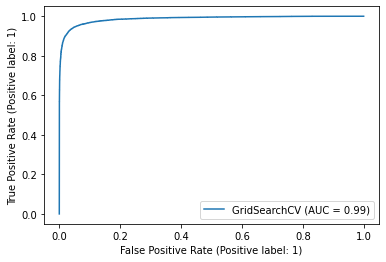

In [110]:
y_pred = clf.predict(X_test)
y_pred[:4]

# Accuracy score

accuracy = accuracy_score(y_test, y_pred)
accuracy * 100.0             

# Confusion matrix

confusion_matrix( y_test,y_pred)

#  F1 score

f1_score(y_test,y_pred, pos_label = 1)      # 0.8664199696263183


f1_score(y_test,y_pred, pos_label = 0)      # 0.729313857223354

# ROC curve and get AUC
print("\n\n--ROC curve--\n")
_=plot_roc_curve(clf, X_test, y_test)

In [112]:
# Tune parameters using random search
# Create the object first

rs = RandomizedSearchCV(
                          pipe_xg,
                          param_distributions=parameters,
                          scoring= ['roc_auc', 'accuracy'],
                          n_iter=4,           # Max combination of
                                              # parameter to try. Default = 10
                          verbose = 1,
                          refit = 'roc_auc',
                          n_jobs = 2,          # Use parallel cpu threads
                          cv = 2               # No of folds.
                                              # So n_iter * cv combinations
                        )


In [114]:
# Run random search 

start = time.time()
rs.fit(X_train, y_train)
end = time.time()
print()
(end - start)/60   # 4 minutes

Fitting 2 folds for each of 4 candidates, totalling 8 fits



1.2141675194104513

In [116]:
# Best Score
f"Best score: {rs.best_score_} "  

'Best score: 0.9871999996260743 '

In [117]:
# Best Parameter set
f"Best parameter set: {rs.best_params_} "

"Best parameter set: {'xg__max_depth': 6, 'xg__learning_rate': 0.05, 'pca__n_components': 11} "

In [118]:
y_pred = rs.predict(X_test)

In [119]:
accuracy = accuracy_score(y_test, y_pred)

In [120]:
f"Accuracy: {accuracy * 100.0}" 

'Accuracy: 94.91068678780412'

In [121]:
f"f1 score: {f1_score(y_test,y_pred, pos_label = 1)}"

'f1 score: 0.9402188658768201'

In [122]:
print("\n\n--How many features--\n")
clf.best_estimator_.named_steps["xg"].feature_importances_.shape


print("\n\n---Feature importances---\n")
clf.best_estimator_.named_steps["xg"].feature_importances_



--How many features--



---Feature importances---



array([0.36604524, 0.12441063, 0.02372671, 0.2154626 , 0.08567119,
       0.0346647 , 0.04169088, 0.02893302, 0.02827746, 0.02499561,
       0.02612196], dtype=float32)

In [123]:
clf.best_estimator_.named_steps["xg"].feature_importances_.shape

(11,)

In [124]:
imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

In [125]:
len(imp_values)

11

In [127]:
index = ['Customer Type', 'Type of Travel', 'Class',
       'Flight Distance','Departure/Arrival time convenient', 'Ease of Online booking',
       'satisfaction', 'Inflight service','satisfaction', 'Baggage handling','Checkin service']

In [128]:
# Create a dataframe of feature importances
# with names of columns and sorted by feature-imp

imp_values = clf.best_estimator_.named_steps["xg"].feature_importances_

df_imp = pd.DataFrame(
                      data = imp_values,
                      index = index,
                      columns = ["imp"]
                      ).sort_values(by = 'imp')

In [129]:
df_imp

,imp
Class,0.023727
Baggage handling,0.024996
Checkin service,0.026122
satisfaction,0.028277
Inflight service,0.028933
Ease of Online booking,0.034665
satisfaction,0.041691
Departure/Arrival time convenient,0.085671
Type of Travel,0.124411
Flight Distance,0.215463


In [130]:
# First five columns with least feature importance are:

list(df_imp.index.values[:5])

['Class',
 'Baggage handling',
 'Checkin service',
 'satisfaction',
 'Inflight service']